In [169]:
import numpy as np
import pandas as pd
import sklearn
import scipy.optimize
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats

# Linear Models for Regression

### Linear Regression Models and Least Squares

For input vector $X^T = (X_1, X_2, ... , X_p)$, we want to predict a real-value input, $Y$

Linear regression model has the form of:

\begin{equation}
\tag{1}
f(X) = \beta_0 + \sum\limits_{j=1}^{p} X_j\beta_j 
\end{equation}

where $\beta_j$'s are unknown parameters and $X_j$ are imputs which can come from the following sources:

* quantitative inputs
* transformations of quantitative inputs
* basis expansions ($X_2 = X_1^2, X_3 = X_1^3$), which can lead to polynomial representation
* numeric coding of the levels of qualitative inputs
* interactions between variables ($X_3 = X_1\cdot X_2$)


The most popular form estimation method is _least squares_, in which we pck the coefficients $\beta=(\beta_0 , \beta_1 , ... , \beta_p)^T$ to minimize the RSS:

\begin{align}
RSS(\beta) &= \sum\limits_{i=1}^{N} (y_i - f(x_i))^2\\
\tag{2}
&= \sum\limits_{i=1}^{N} (y_i - \beta_0 - \sum\limits_{j=1}^{p} x_{ij}\beta_j)^2
\end{align}


* Reasonable if the training observations $(x_i, y_i)$ represent independent random draws from their population.
    - If $x_i$'s are not drawn randomly, still ok if $y_i$'s are conditionally independent given the inputs $x_i$


__How do we minimize eqn(2)?__
Denote by $X$ the $N * (p + 1)$ matrix with each row an input vector, and let $y$ be the N-vector of outputs in the training set. Therfore, the RSS can be rewriten as:

\begin{equation}
\tag{3}
RSS(\beta) = (\mathbf{y} - \mathbf{X}\beta)^T (\mathbf{y}-\mathbf{X}\beta)
\end{equation}
This is a quadratic function in the p + 1 parameters. 

Differentiating w/ respect to \beta:

\begin{align}
\dfrac{\partial RSS}{\partial \beta} &= -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)\\
\dfrac{\partial^2 RSS}{\partial \beta\partial \beta^T} &= -2\mathbf{X}^T\mathbf{X}
\end{align}

Assuming $\mathbf{X}$ has full column rank, $\mathbf{X}^T\mathbf{X}$ is pos definite, first derivative can be set to 0

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0
\end{equation}
and the unique solution can be found:
\begin{equation}
\tag{4}
\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}

<span style="color:green">Note: rank of a matrix $\mathbf{A}$ is the dimension of the vector space generated (or spanned) by its columns. A matrix is said to have __full rank__ if its rank equals the largest possible for a matrix of the same dimensions, which is the lesser of the number of rows and columns. A matrix is said to be __rank-deficient__ if it does not have full rank. The __rank deficiency__ of a matrix is the difference between the lesser between the number of rows and columns, and the rank. <\span>

The predicted values at an input vector $x_0$ are given by $\hat{f}(x_0) = (1 : x_0)^T\hat{\beta}$; the fitted values at the training inputs are:

\begin{align}
\mathbf{\hat{y}} &= \mathbf{X} \hat{\beta}\\
&= \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}

* $\mathbf{H} = \mathbf{X} (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ == The "hat matrix"
* The hat matrix $\mathbf{H}$ also computes the _orthogonal projection_ ($\hat{y}$), and is therefore also known as the _projection matrix_
* The non-full-rank case occurs most often when one or more qualitative inputs are coded in a redundant fashion.
* There is a way to resolve non-unique represention $\rightarrow$ recoding and/or dropping redundant colums
    - Most sotware packages automatically do this
* Rank deficiencies can also occur in signal and image analysis
    - number of inputs, $p$ can exceed the number of training cases, $N$
    - To resolve this, features are reduced by filtering or by regularization

Using eqn(4), and assuming $y_i$ are uncorrelated and have constant variance $\sigma^2$ and $x_i$ are non-random, we van get the variance of $\hat{\beta}$:

\begin{equation}
Var(\hat{\beta}) = (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2
\end{equation}
Typically, estimation of $\sigma^2$ is:
\begin{equation}
\sigma^2 = \dfrac{1}{N - p - 1}\sum\limits_{i=1}^{N}(y_i-\hat{y}_i)^2
\end{equation}

_Note: We use $(N - p - 1)$ in denominator to make $\hat{\sigma}^2$ an unbiased estimate of $\sigma^2$ : $E(\hat{\sigma}^2) = \sigma^2$_

To draw inferences about the parameters of the model, additional assumptions are needed:
1. eqn(1) is the correct model for the mean
2. Deviations of $Y$ around its expectation are additive and Gaussian:

\begin{align}
Y &= E(Y|X_1, ... , X_p) + \epsilon\\
&= \beta_0 + \sum\limits_{j=1}^{p}X_j\beta_j + \epsilon
\tag{5}
\end{align}

Where error $\epsilon$ is a Gaussian r.v. $\epsilon \sim N(0, \sigma^2)$

From eqn(5):
\begin{equation}
\tag{6}
\hat{\beta} \sim N(\beta,(\mathbf{X}^T\mathbf{X})^{-1}\sigma^2)
\end{equation}

This is a __multivariate normal distribution__ with mean vector and variance covariance:
\begin{equation}
(N-p-1)\hat{\sigma}^2 \sim \sigma^2\chi^2_{N-p-1}
\end{equation}
a chi-squared distribution with N-p-1 degrees of freedom. \hat{\beta} and \hat{\sigma}^2 are statistically independent.

We use these distribution scores to __form tests and hypothesis and confidence intervals__ for the parameters $\beta_j$
To do this, form a standardized coefficient or _Z-score_

\begin{equation}
z_j = \dfrac{\hat{\beta}_j}{\hat{\sigma}\sqrt{v_j}}
\end{equation}

where $v_j$ is the _j_th diagonal element of $(\mathbf{X}^T\mathbf{X})^{-1}$

For null hypothesis $H_0 : \beta_j = 0$, $z_j$ is distributed as $t_{N-p-1}$ (a t-distribution with d.o.f. $N-p-1$)


__sometimes we need to test for significance of groups of coefficients simultaneously__

For this, we use the F-statstic:
\begin{equation}
F = \dfrac{(RSS_0-RSS_1)/(p_1-p_0)}{RSS_1/(N-p-1)}
\end{equation}

where $RSS_1$ is the residual sum of squares for the least squares fit of the bigger model with $p_1 + 1$ params and $RSS_0$ is the nested smaller model with $p_0$ + 1 parameters, having $p_1-p_0$ parameters constrained to be zero.

F statistic measures the change in residual sum-of-squares per aditional parameter in the bigger model, and it is normalized by an estimate of $\sigma^2$

Under Gaussian assumptions, and the null hypothesis that the smaller model is correct, the F statistic will have a $F_{p_1-p_0, N-p_1-1}$ distribution

We can isolate $\beta_j$ in eqn(6) to obtain a $1-2\alpha$ CI for $\beta_j$:

\begin{equation}
(\hat{\beta_j}-z^{(1-\alpha)}v_j^{\dfrac{1}{2}}\hat{\sigma}, \hat{\beta_j}+z^{(1-\alpha)}v_j^{\dfrac{1}{2}}\hat{\sigma})
\end{equation}

where $z^(1-\alpha)$ is the $(1-\alpha)$ percentile of the normal distribution:

\begin{align}
z^{(1-.025)} &= 1.96\\
z^{(1-.05)} &= 1.645, etc.
\end{align}

For the confidence set for the entire parameter vector $\beta$:


\begin{equation}
C_{\beta} = \{\beta|(\hat{\beta}-\beta)^T\mathbf{X}^T\mathbf{X}(\hat{\beta}-\beta)\} \leq {\hat{\sigma}^2\chi_{p+1}^2}^{(1-\alpha)}\}
\end{equation}


where ${\chi_l^{2}}^{(1-\alpha)}$ is the $1-\alpha$ percentile of the chi-squared distribution of $l$ degrees of freedom: i.e. ${\chi_5^2}^{(1-0.05)} = 11.1$. This confidence set for $\beta$ generates a corresponding confidence set for the true function $f(x) = x^T\beta$, namely $\{x^T\beta|\beta\in C_/beta\}$

### Problems:


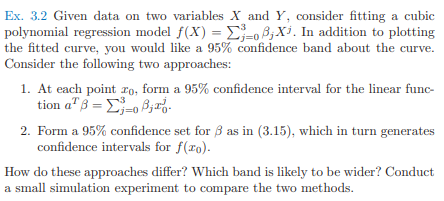

For this problem, I will be using a two-dimensional version of the boston house pricing dataset on sklearn.

In [124]:
boston = datasets.load_boston()
x_data = np.array(boston['data'])
y_data = np.array(boston['target'])
feat = np.array(boston['feature_names'])
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 1.0, 'Boston House Pricing')

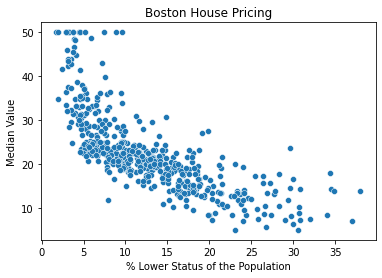

In [208]:
feature = 'LSTAT'
mask = (feat == feature)
x = np.concatenate(x_data[:,mask])
y = y_data
# plotting our data:
f, ax = plt.subplots()
sns.scatterplot(x=x, y=y)
ax.set_xlabel("% Lower Status of the Population")
ax.set_ylabel("Median Value")
ax.set_title("Boston House Pricing")

#### Calculate a model

/home/dash2927/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boston House Pricing')

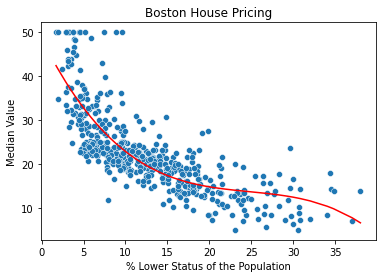

In [209]:
# Fitting our data to a cubic function:
def cubic_function(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

popt, pcov = curve_fit(cubic_function, x, y)

y_hat = cubic_function(x, *popt)
residuals = y - y_hat
f, ax = plt.subplots()
sns.scatterplot(x=x, y=y)
sns.lineplot(x, y_hat, color='red')
ax.set_xlabel("% Lower Status of the Population")
ax.set_ylabel("Median Value")
ax.set_title("Boston House Pricing")

#### Reproduce using linear algebra

In [147]:
x_vals = np.array([x, x**2, x**3])
x_vals = np.array([a for a in zip(*x_vals)])

In [160]:
N = x.size
p = 3 + 1  # cubic polymomial plus one because LinearRegression adds an intercept term (in book, this is p+1)

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = x_vals

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  @ X_with_intercept.T @ y

beta_hat

array([ 4.86496253e+01, -3.86559278e+00,  1.48738477e-01, -2.00386767e-03])

In [161]:
# Comparing with trained model, we can see we got the same coefficients
popt

array([ 4.86496251e+01, -3.86559272e+00,  1.48738473e-01, -2.00386760e-03])

In [180]:
RSS = residuals.T @ residuals
sigma_squared_hat = RSS/(N-p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
SE = []

for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    SE.append(standard_error)
SE = np.array(SE)
z_score = beta_hat/SE

In [181]:
pd.DataFrame(np.array([beta_hat, SE, z_score]).T, columns=['beta', 'SE', 'z_score'])

,beta,SE,z_score
0,48.649625,1.434724,33.908701
1,-3.865593,0.328786,-11.757165
2,0.148738,0.021299,6.983441
3,-0.002004,0.000400,-5.013375


In [210]:
var_u = []
y_hat_ub = []
y_hat_lb = []
for x_j in X_with_intercept:
    var_u_x = x_j @ np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ x_j.T
    var_u.append(var_u_x)
var_u = np.array(var_u)
y_hat_ub = y_hat + 1.96*var_u**0.5
y_hat_lb = y_hat - 1.96*var_u**0.5

In [183]:
beta_lb = beta_hat - 2*SE
beta_ub = beta_hat + 2*SE

/home/dash2927/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dash2927/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dash2927/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

Text(0.5, 1.0, 'Boston House Pricing')

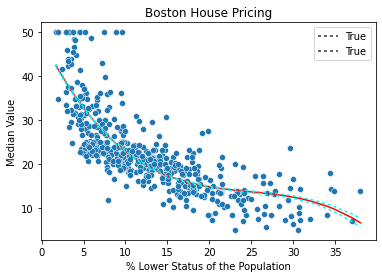

In [214]:
f, ax = plt.subplots()
sns.scatterplot(x=x, y=y)
sns.lineplot(x, y_hat, color='red')
sns.lineplot(x, y_hat_ub, color='cyan', style=True, dashes=[(2,2)])
sns.lineplot(x, y_hat_lb, color='cyan', style=True, dashes=[(2,2)])
ax.set_xlabel("% Lower Status of the Population")
ax.set_ylabel("Median Value")
ax.set_title("Boston House Pricing")